In [1]:
from helper import *

In [2]:
! pip install pandas nltk gensim pyldavis
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bednar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/bednar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()

def cleaning(article):
    one = " ".join([i for i in article.lower().split() if i not in stopwords])
    one = [i for i in str(one) if i not in punctuation]
    two = "".join(one)
    three = " ".join(lemmatize.lemmatize(i) for i in two.split())
    return three


def cleaning_fail(article):
    one = " ".join([i for i in article.lower().split() if i not in stopwords])
    three = " ".join(lemmatize.lemmatize(i) for i in one.split())
    return three

In [5]:
import pickle


with open('human_readable.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    human_readable = pickle.load(f)
    

In [6]:
from langdetect import detect
data_samples = []
count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
i = 0

for file in human_readable[:100000]:
    with open(file, 'r') as file_reader:
        data = file_reader.read()
        
    try:
        lang = detect(data)
    except:
        lang = 'null'
    if lang != 'en':
        continue
     
    data = '\n'.join([x for x in data.split("\n") if x.strip()!=''])
    
    punctuation = count(data, string.punctuation)
    punctuation_coding = count(data, string.punctuation.replace("!", "").replace(".", "").replace("?", "").replace(",", ""))
    if punctuation_coding/len(data) < 0.06:
        data_samples.append(data)

    if i%5000 == 0:
        print(i, "/", 100000)
        
    i += 1
        
n_samples = len(data_samples)

0 / 100000
5000 / 100000


In [7]:
data_samples_2 = []

for text in data_samples:
    try:
        cleaned = cleaning(text).split()
    except:
        cleaned = cleaning_fail(text).split()
    data_samples_2.append(cleaned)

In [9]:
text_list = data_samples_2

In [10]:
len(text_list)

4385

In [11]:
text_list = text_list[:20000]

In [12]:
from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='running.log',filemode='w')

In [13]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(text_list)
dictionary.save('dictionary.dict')
print(dictionary)

Dictionary(167601 unique tokens: ['##gear', '1.', '2.', '3.', '4.']...)


In [14]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print(len(doc_term_matrix))
print(doc_term_matrix[100])

4385
[(7, 1), (8, 1), (21, 1), (33, 2), (46, 2), (48, 1), (57, 1), (59, 1), (64, 1), (68, 4), (74, 1), (76, 1), (78, 1), (83, 3), (109, 1), (115, 1), (124, 1), (126, 2), (127, 2), (128, 2), (136, 2), (138, 2), (152, 1), (166, 1), (170, 1), (225, 1), (265, 5), (276, 1), (287, 1), (291, 3), (292, 3), (293, 1), (297, 1), (309, 1), (310, 1), (313, 1), (327, 1), (337, 1), (347, 1), (351, 2), (374, 1), (376, 3), (395, 1), (396, 3), (478, 1), (497, 2), (499, 1), (532, 1), (552, 3), (554, 1), (582, 1), (602, 1), (662, 1), (667, 5), (683, 2), (699, 2), (728, 1), (762, 1), (780, 1), (789, 1), (796, 1), (927, 1), (1049, 1), (1122, 1), (1135, 1), (1165, 2), (1166, 4), (1187, 2), (1196, 1), (1221, 1), (1363, 1), (1378, 1), (1393, 1), (1458, 1), (1472, 3), (1481, 1), (1499, 3), (1530, 1), (1563, 1), (1647, 2), (1660, 1), (1701, 2), (1735, 1), (1768, 1), (1776, 1), (1791, 1), (1815, 1), (1819, 6), (1820, 1), (1861, 1), (1893, 1), (1925, 1), (1969, 1), (2066, 1), (2109, 1), (2110, 1), (2170, 3), (2191

In [15]:
%%time
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=20, id2word = dictionary, passes=50)
print('used: {:.2f}s'.format(time()-start))

used: 133.45s
CPU times: user 11min 53s, sys: 4.64 s, total: 11min 57s
Wall time: 2min 13s


In [16]:
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(7, '0.034*"." + 0.020*"download" + 0.017*"free" + 0.011*"window"'), (19, '0.019*"wedding" + 0.008*"planet" + 0.007*"destroyer" + 0.006*"dress"')]


In [17]:
for i in ldamodel.print_topics(): 
    for j in i: print(j)

0
0.018*"0.00," + 0.010*"failed" + 0.007*"▲:" + 0.007*"cog" + 0.006*"tried" + 0.005*"▼:" + 0.004*"breloom" + 0.003*"0.00);" + 0.003*"email" + 0.003*"**"
1
0.019*"hack" + 0.007*"transfer" + 0.006*"na" + 0.006*"generator" + 0.006*"pm,internet" + 0.005*"farmville" + 0.005*"am,internet" + 0.005*"coin" + 0.005*"javascript" + 0.004*"cash"
2
0.011*"bear" + 0.010*"-" + 0.010*"kb" + 0.009*"|" + 0.008*"chakra" + 0.007*"function" + 0.007*"los" + 0.007*"amount" + 0.007*"angeles" + 0.007*"sep"
3
0.016*"games:" + 0.015*"1" + 0.015*"mew" + 0.013*"-" + 0.011*"used" + 0.007*"2" + 0.006*"kit" + 0.006*"turn" + 0.006*"14" + 0.006*"mar"
4
0.104*"0.00000," + 0.022*"0.00000);" + 0.018*"red," + 0.017*"black," + 0.017*"green," + 0.016*"check" + 0.015*"white," + 0.013*"md5" + 0.013*"passed!" + 0.010*"90.00000);"
5
0.049*"-" + 0.008*"use" + 0.007*"ago" + 0.006*"year" + 0.006*"day" + 0.005*"1" + 0.005*"new" + 0.004*"may" + 0.004*"need" + 0.004*"server"
6
0.063*"=" + 0.020*"pm" + 0.015*"im" + 0.014*"fortnite" + 0.

In [18]:
ldamodel.save('topic.model')

In [19]:
#-------------

In [20]:
from gensim.models import LdaModel
loading = LdaModel.load('topic.model')

In [21]:
def pre_new(doc):
    try:
        one = cleaning(doc).split()
    except:
        one = cleaning_fail(doc).split()
    two = dictionary.doc2bow(one)
    return two

In [22]:
pre_new('new article that to be classified by trained model!')

[(80, 1), (3042, 1), (3986, 1), (73850, 1)]

In [23]:
belong = loading[(pre_new('movie download free hd'))]
belong

[(0, 0.010000031),
 (1, 0.010000031),
 (2, 0.010000031),
 (3, 0.010000031),
 (4, 0.010000031),
 (5, 0.010000031),
 (6, 0.010000031),
 (7, 0.010000031),
 (8, 0.010000031),
 (9, 0.010000031),
 (10, 0.80999947),
 (11, 0.010000031),
 (12, 0.010000031),
 (13, 0.010000031),
 (14, 0.010000031),
 (15, 0.010000031),
 (16, 0.010000031),
 (17, 0.010000031),
 (18, 0.010000031),
 (19, 0.010000031)]

In [24]:
import pandas as pd
new = pd.DataFrame(belong,columns=['id','prob']).sort_values('prob',ascending=False)
new['topic'] = new['id'].apply(loading.print_topic)
new

,id,prob,topic
10,10,0.809999,"0.080*""movie"" + 0.058*""."" + 0.051*""download"" +..."
1,1,0.010000,"0.019*""hack"" + 0.007*""transfer"" + 0.006*""na"" +..."
18,18,0.010000,"0.044*""#"" + 0.024*""*"" + 0.019*""set"" + 0.015*""p..."
17,17,0.010000,"0.009*""like"" + 0.007*""one"" + 0.006*""get"" + 0.0..."
16,16,0.010000,"0.049*""0"" + 0.046*""1"" + 0.025*""2"" + 0.016*""3"" ..."
15,15,0.010000,"0.054*""00"" + 0.021*"";"" + 0.013*""mr"" + 0.012*""—..."
14,14,0.010000,"0.017*""porn"" + 0.013*""sex"" + 0.011*""video"" + 0..."
13,13,0.010000,"0.022*""v"" + 0.013*""..."" + 0.012*""live"" + 0.011..."
12,12,0.010000,"0.039*""-"" + 0.016*""point"" + 0.012*"""" + 0.009..."
11,11,0.010000,"0.011*""jurassic"" + 0.011*""fallen"" + 0.011*""kin..."


In [25]:
new['topic']

10    0.080*"movie" + 0.058*"." + 0.051*"download" +...
1     0.019*"hack" + 0.007*"transfer" + 0.006*"na" +...
18    0.044*"#" + 0.024*"*" + 0.019*"set" + 0.015*"p...
17    0.009*"like" + 0.007*"one" + 0.006*"get" + 0.0...
16    0.049*"0" + 0.046*"1" + 0.025*"2" + 0.016*"3" ...
15    0.054*"00" + 0.021*";" + 0.013*"mr" + 0.012*"—...
14    0.017*"porn" + 0.013*"sex" + 0.011*"video" + 0...
13    0.022*"v" + 0.013*"..." + 0.012*"live" + 0.011...
12    0.039*"-" + 0.016*"point" + 0.012*"" + 0.009...
11    0.011*"jurassic" + 0.011*"fallen" + 0.011*"kin...
0     0.018*"0.00," + 0.010*"failed" + 0.007*"▲:" + ...
9     0.155*":" + 0.044*"complete" + 0.039*"/" + 0.0...
8     0.029*"trooper" + 0.028*"skull" + 0.015*"bravo...
7     0.034*"." + 0.020*"download" + 0.017*"free" + ...
6     0.063*"=" + 0.020*"pm" + 0.015*"im" + 0.014*"f...
5     0.049*"-" + 0.008*"use" + 0.007*"ago" + 0.006*...
4     0.104*"0.00000," + 0.022*"0.00000);" + 0.018*"...
3     0.016*"games:" + 0.015*"1" + 0.015*"mew" +

In [26]:
%%time
import gensim
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('./topic.model')

CPU times: user 270 ms, sys: 69.4 ms, total: 339 ms
Wall time: 409 ms


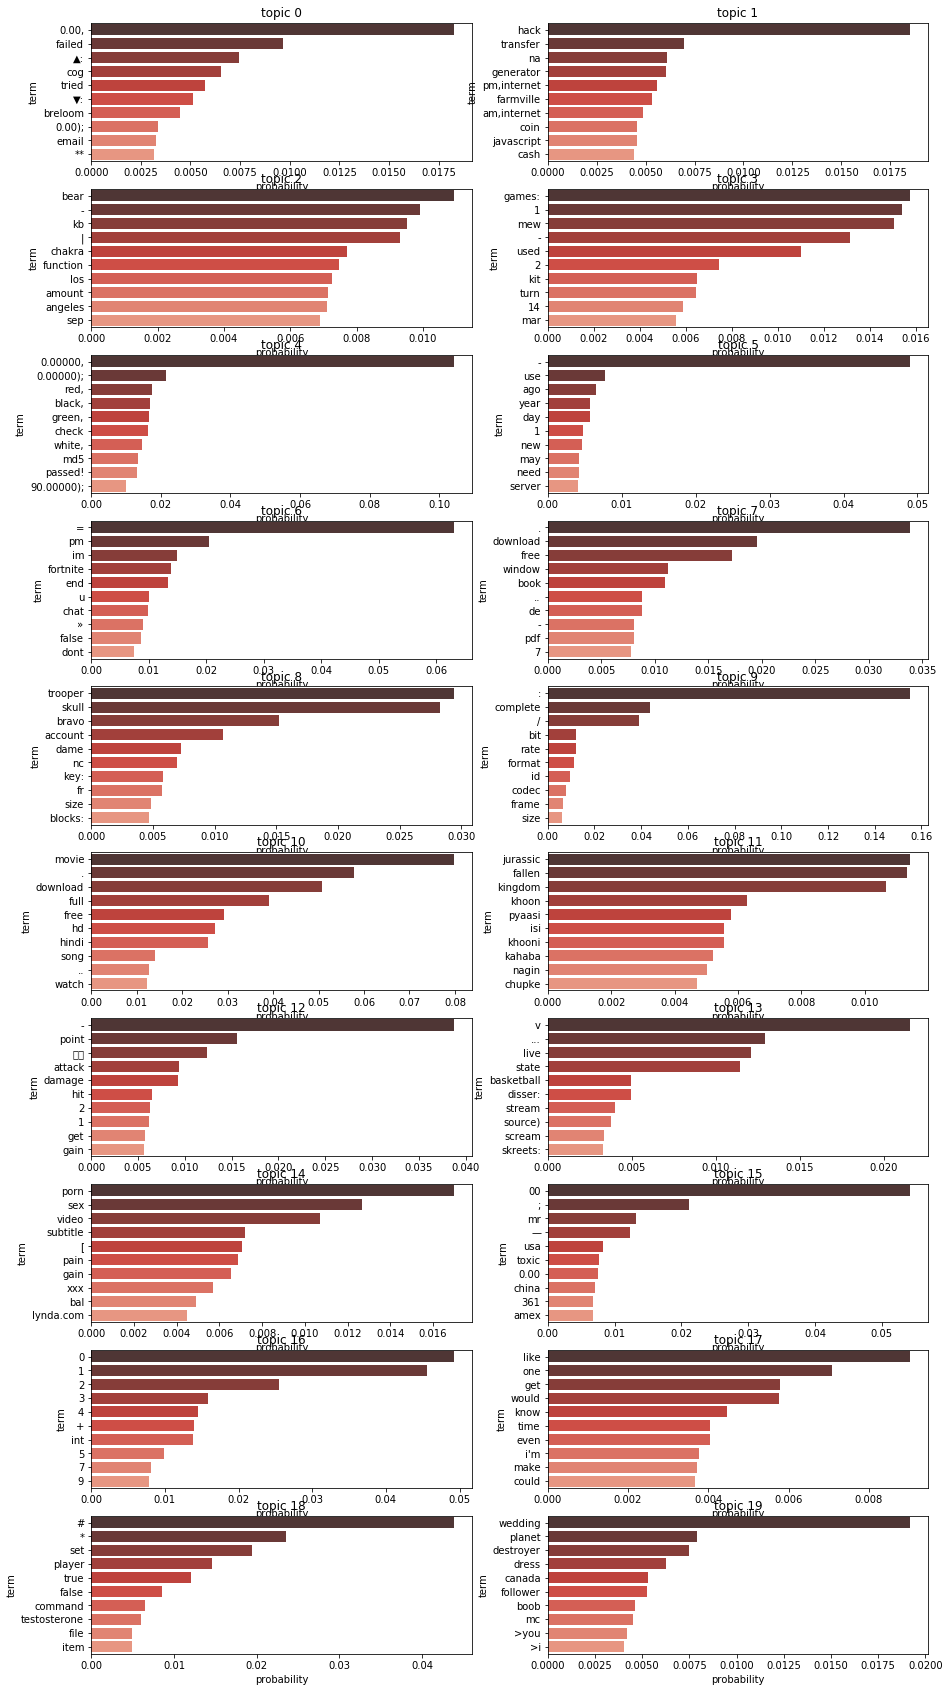

In [27]:
fiz=plt.figure(figsize=(15,30))
for i in range(20):
    df=pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
#     df=df.sort_values('prob')
    
    plt.subplot(10,2,i+1)
    plt.title('topic '+str(i))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()


In [28]:
topics_names_dict = {
    0: "server logs",
    1: "online gaming",
    2: "server logs",
    3: "online gaming",
    4: "server logs",
    5: "server logs",
    6: "online gaming",
    7: "torrent info",
    8: "online gaming",
    9: "torrent info",
    10: "torrent info",
    11: "torrent info",
    12: "online gaming",
    13: "torrent info",
    14: "torrent info",
    15: "trading",
    16: "server logs",
    17: "meaningful content",
    18: "meaningful content",
    19: "meaningful content"
}

In [28]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [29]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('topic.model')

In [30]:
%%time
data = pyLDAvis.gensim.prepare(lda, c, d)
data

CPU times: user 1min 19s, sys: 1.09 s, total: 1min 20s
Wall time: 32min 5s


In [31]:
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17    -0.287460 -0.244591       1        1  32.419605
10    -0.350154  0.271322       2        1  26.678663
5     -0.261696 -0.144681       3        1  10.879160
7     -0.187221  0.157694       4        1   4.144716
4      0.040687  0.009289       5        1   3.000406
16     0.010086  0.023532       6        1   2.858955
12    -0.027853 -0.075238       7        1   2.627156
2     -0.032125 -0.082474       8        1   2.565700
6      0.035169 -0.030965       9        1   2.172599
3      0.033510 -0.008854      10        1   2.041887
14     0.004770  0.072866      11        1   2.027144
9      0.050582  0.040093      12        1   1.834658
18     0.026163 -0.078076      13        1   1.671254
13     0.112318  0.011928      14        1   1.227314
15     0.130364  0.022488      15        1   1.150276
19     0.138141  0.004943      16        1   0.683379
8      0.130058  0.016574      17        1   0.574657
0      0.145725  0.006916      18        1   0.511097
11     0.142447  0.014602      19        1   0.466870
1      0.146489  0.012633      20        1   0.464506, topic_info=      Category          Freq                  Term         Total  loglift  \
410    Default  25007.000000                 movie  25007.000000  30.0000   
383    Default  19751.000000                     .  19751.000000  29.0000   
389    Default  16922.000000              download  16922.000000  28.0000   
613    Default  11382.000000                     -  11382.000000  27.0000   
550    Default   3617.000000                     :   3617.000000  26.0000   
3888   Default   3673.000000              0.00000,   3673.000000  25.0000   
395    Default  12758.000000                  full  12758.000000  24.0000   
393    Default  10320.000000                  free  10320.000000  23.0000   
397    Default   8564.000000                    hd   8564.000000  22.0000   
399    Default   8083.000000                 hindi   8083.000000  21.0000   
147    Default   3650.000000                     1   3650.000000  20.0000   
152    Default   4165.000000                     2   4165.000000  19.0000   
2501   Default   1643.000000                     =   1643.000000  18.0000   
145    Default   4393.000000                    ..   4393.000000  17.0000   
4599   Default   1741.000000                     0   1741.000000  16.0000   
431    Default   3843.000000                 video   3843.000000  15.0000   
421    Default   4529.000000                  song   4529.000000  14.0000   
143    Default   3680.000000  ********************   3680.000000  13.0000   
433    Default   4021.000000                 watch   4021.000000  12.0000   
937    Default   1474.000000                     /   1474.000000  11.0000   
801    Default   2889.000000               torrent   2889.000000  10.0000   
961    Default   1198.000000              complete   1198.000000   9.0000   
415    Default   3543.000000                online   3543.000000   8.0000   
141    Default   4222.000000                     &   4222.000000   7.0000   
619    Default   2458.000000                     3   2458.000000   6.0000   
732    Default   3014.000000                  720p   3014.000000   5.0000   
68     Default   3623.000000                  like   3623.000000   4.0000   
2564   Default    880.000000                     #    880.000000   3.0000   
827    Default   2554.000000                dubbed   2554.000000   2.0000   
10704  Default    736.000000                    00    736.000000   1.0000   
...        ...           ...                   ...           ...      ...   
34190  Topic20      4.464032              pannalal      5.278296   5.2044   
92823  Topic20      4.463965            cleanmymac      5.278229   5.2044   
79867  Topic20      4.462423             thanedaar      5.276687   5.2043   
34184  Topic20      4.442690              heeralal      5.256954   5.2037 